# 2021/12/29
# 本代码绘制论文version1.2中的fig2d
# 内容为10m地面风叠加散度

In [2]:
import os
import sys
import xarray as xr
import numpy as np
module_path = ["/home/sun/mycode/module/","/data5/2019swh/mycode/module/"]
sys.path.append(module_path[0])
from module_sun import *
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from metpy.units import units
from matplotlib.path import Path
import matplotlib.patches as patches
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [3]:
path  =  "/home/sun/qomo-data/"


f1  =  xr.open_dataset(path+"composite_u10v10.nc")
f2  =  xr.open_dataset("/home/sun/qomo-data/composite-merra2-single.nc")

avg_u  =  np.average(f1.u10m.data[0:30,:],axis=0)
avg_v  =  np.average(f1.v10m.data[0:30,:],axis=0)

disy,disx,location = cal_xydistance(f1.lat,f1.lon)
vy =  np.gradient(avg_v,location,axis=0)
ux = copy.deepcopy(vy)
for i in range(181):
    ux[i,:] = np.gradient(avg_u[i,:],disx[i],axis=0)
    
div  =  (vy+ux)*1E6 #注意这里放缩了

/home/sun/.conda/envs/swh/lib/python3.9/site-packages/numpy/lib/function_base.py:1080: RuntimeWarning: invalid value encountered in true_divide
  out[tuple(slice1)] = (f[tuple(slice4)] - f[tuple(slice2)]) / (2. * ax_dx)
/home/sun/.conda/envs/swh/lib/python3.9/site-packages/numpy/lib/function_base.py:1101: RuntimeWarning: invalid value encountered in double_scalars
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_0
/home/sun/.conda/envs/swh/lib/python3.9/site-packages/numpy/lib/function_base.py:1108: RuntimeWarning: invalid value encountered in double_scalars
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_n


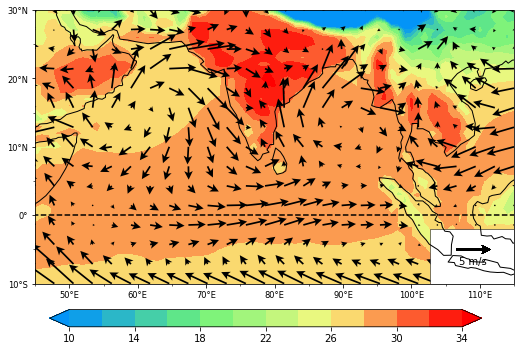

In [4]:
viridis = cm.get_cmap('rainbow')
newcolors = viridis(np.linspace(0, 0.9, 15))
newcmp = ListedColormap(newcolors)

from pylab import *
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
clist=['#0394f7','#6df279','#f9f980','#ff0000']

newcmp = LinearSegmentedColormap.from_list('chaos',clist)

lonmin,lonmax,latmin,latmax  =  45,115,-10,30
extent     =  [lonmin,lonmax,latmin,latmax]

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from palettable.colorbrewer.sequential import Oranges_5


props = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)

proj    =  ccrs.PlateCarree()
fig1    =  plt.figure(figsize=(10,8))

j = 0
    

ax = fig1.add_subplot(projection=proj)

# 设置经纬度刻度.
set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
ax.set_extent(extent, crs=proj)

ax.plot([40,120],[0,0],'--',color='k')
im  =  ax.contourf(f2.lon,f2.lat,np.average(f2.T2M.data-273.15,axis=0),np.linspace(10,34,13),cmap=newcmp,alpha=1,extend='both')
ax.coastlines(resolution='110m',lw=1)
q  =  ax.quiver(f1.lon, f1.lat, avg_u, avg_v, 
                regrid_shape=15, angles='uv',   # regrid_shape这个参数越小，是两门就越稀疏
                scale_units='xy', scale=1,        # scale是参考矢量，所以取得越大画出来的箭头就越短
                units='xy', width=0.25,
                transform=proj,
                color='k',linewidth=1.2,headlength = 5, headaxislength = 4, headwidth = 5)

#ax.text(0.05,0.825,"c",transform=ax.transAxes,bbox=props,fontsize=20)

rect = mpl.patches.Rectangle((0.825, 0), 0.175, 0.2, transform=ax.transAxes,    # 这个能辟出来一块区域，第一个参数是最左下角点的坐标，后面是矩形的长和宽
                            fc='white', ec='k', lw=0.5, zorder=1.1
                            )
ax.add_patch(rect)

qk = ax.quiverkey(q, X=0.915, Y=0.125, U=5,
                    label=f'{5} m/s', labelpos='S', labelsep=0.1,)

j += 1


fig1.subplots_adjust(top=0.6) 
cbar_ax = fig1.add_axes([0.2, 0.05, 0.6, 0.03]) 
fig1.colorbar(im, cax=cbar_ax, shrink=0.1, pad=0.1, orientation='horizontal')


plt.savefig("/home/sun/paint/lunwen/version1.4-Wu/fig2_v1.4_2m_vector_2m_temperature.pdf", bbox_inches='tight', dpi=350)
plt.show()